<a href="https://colab.research.google.com/github/ruchitha11n/data-science-ExcelR/blob/main/MLR_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME: **NADIPELLI RUCHITHA**

COURSE: **DATA SCIENCE (3PM TO 5PM)**

INCHARGE: **PANAM SRAVANI**

**ASS_6.MLR**

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load dataset
df = pd.read_csv('/content/ToyotaCorolla - MLR.csv')

In [ ]:
# 1. Exploratory Data Analysis (EDA)
print("\nDataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB
None

Summary Statistics:
              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080 

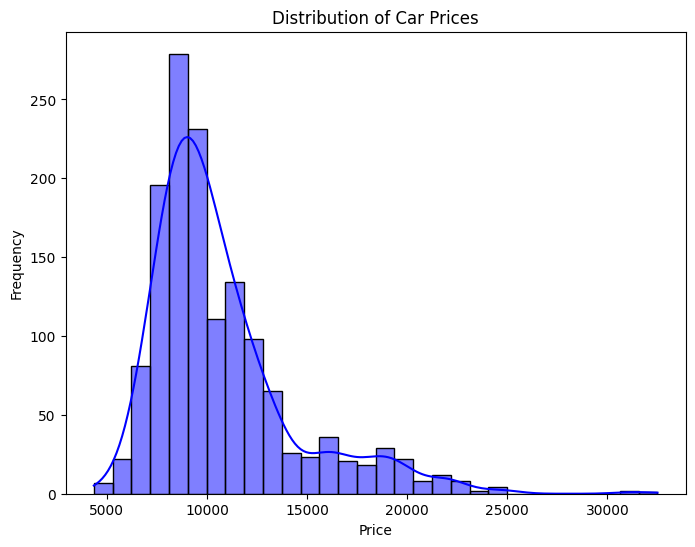

In [ ]:
# Visualizing the distribution of Price
plt.figure(figsize=(8, 6))
sns.histplot(df['Price'], bins=30, kde=True, color='blue')
plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

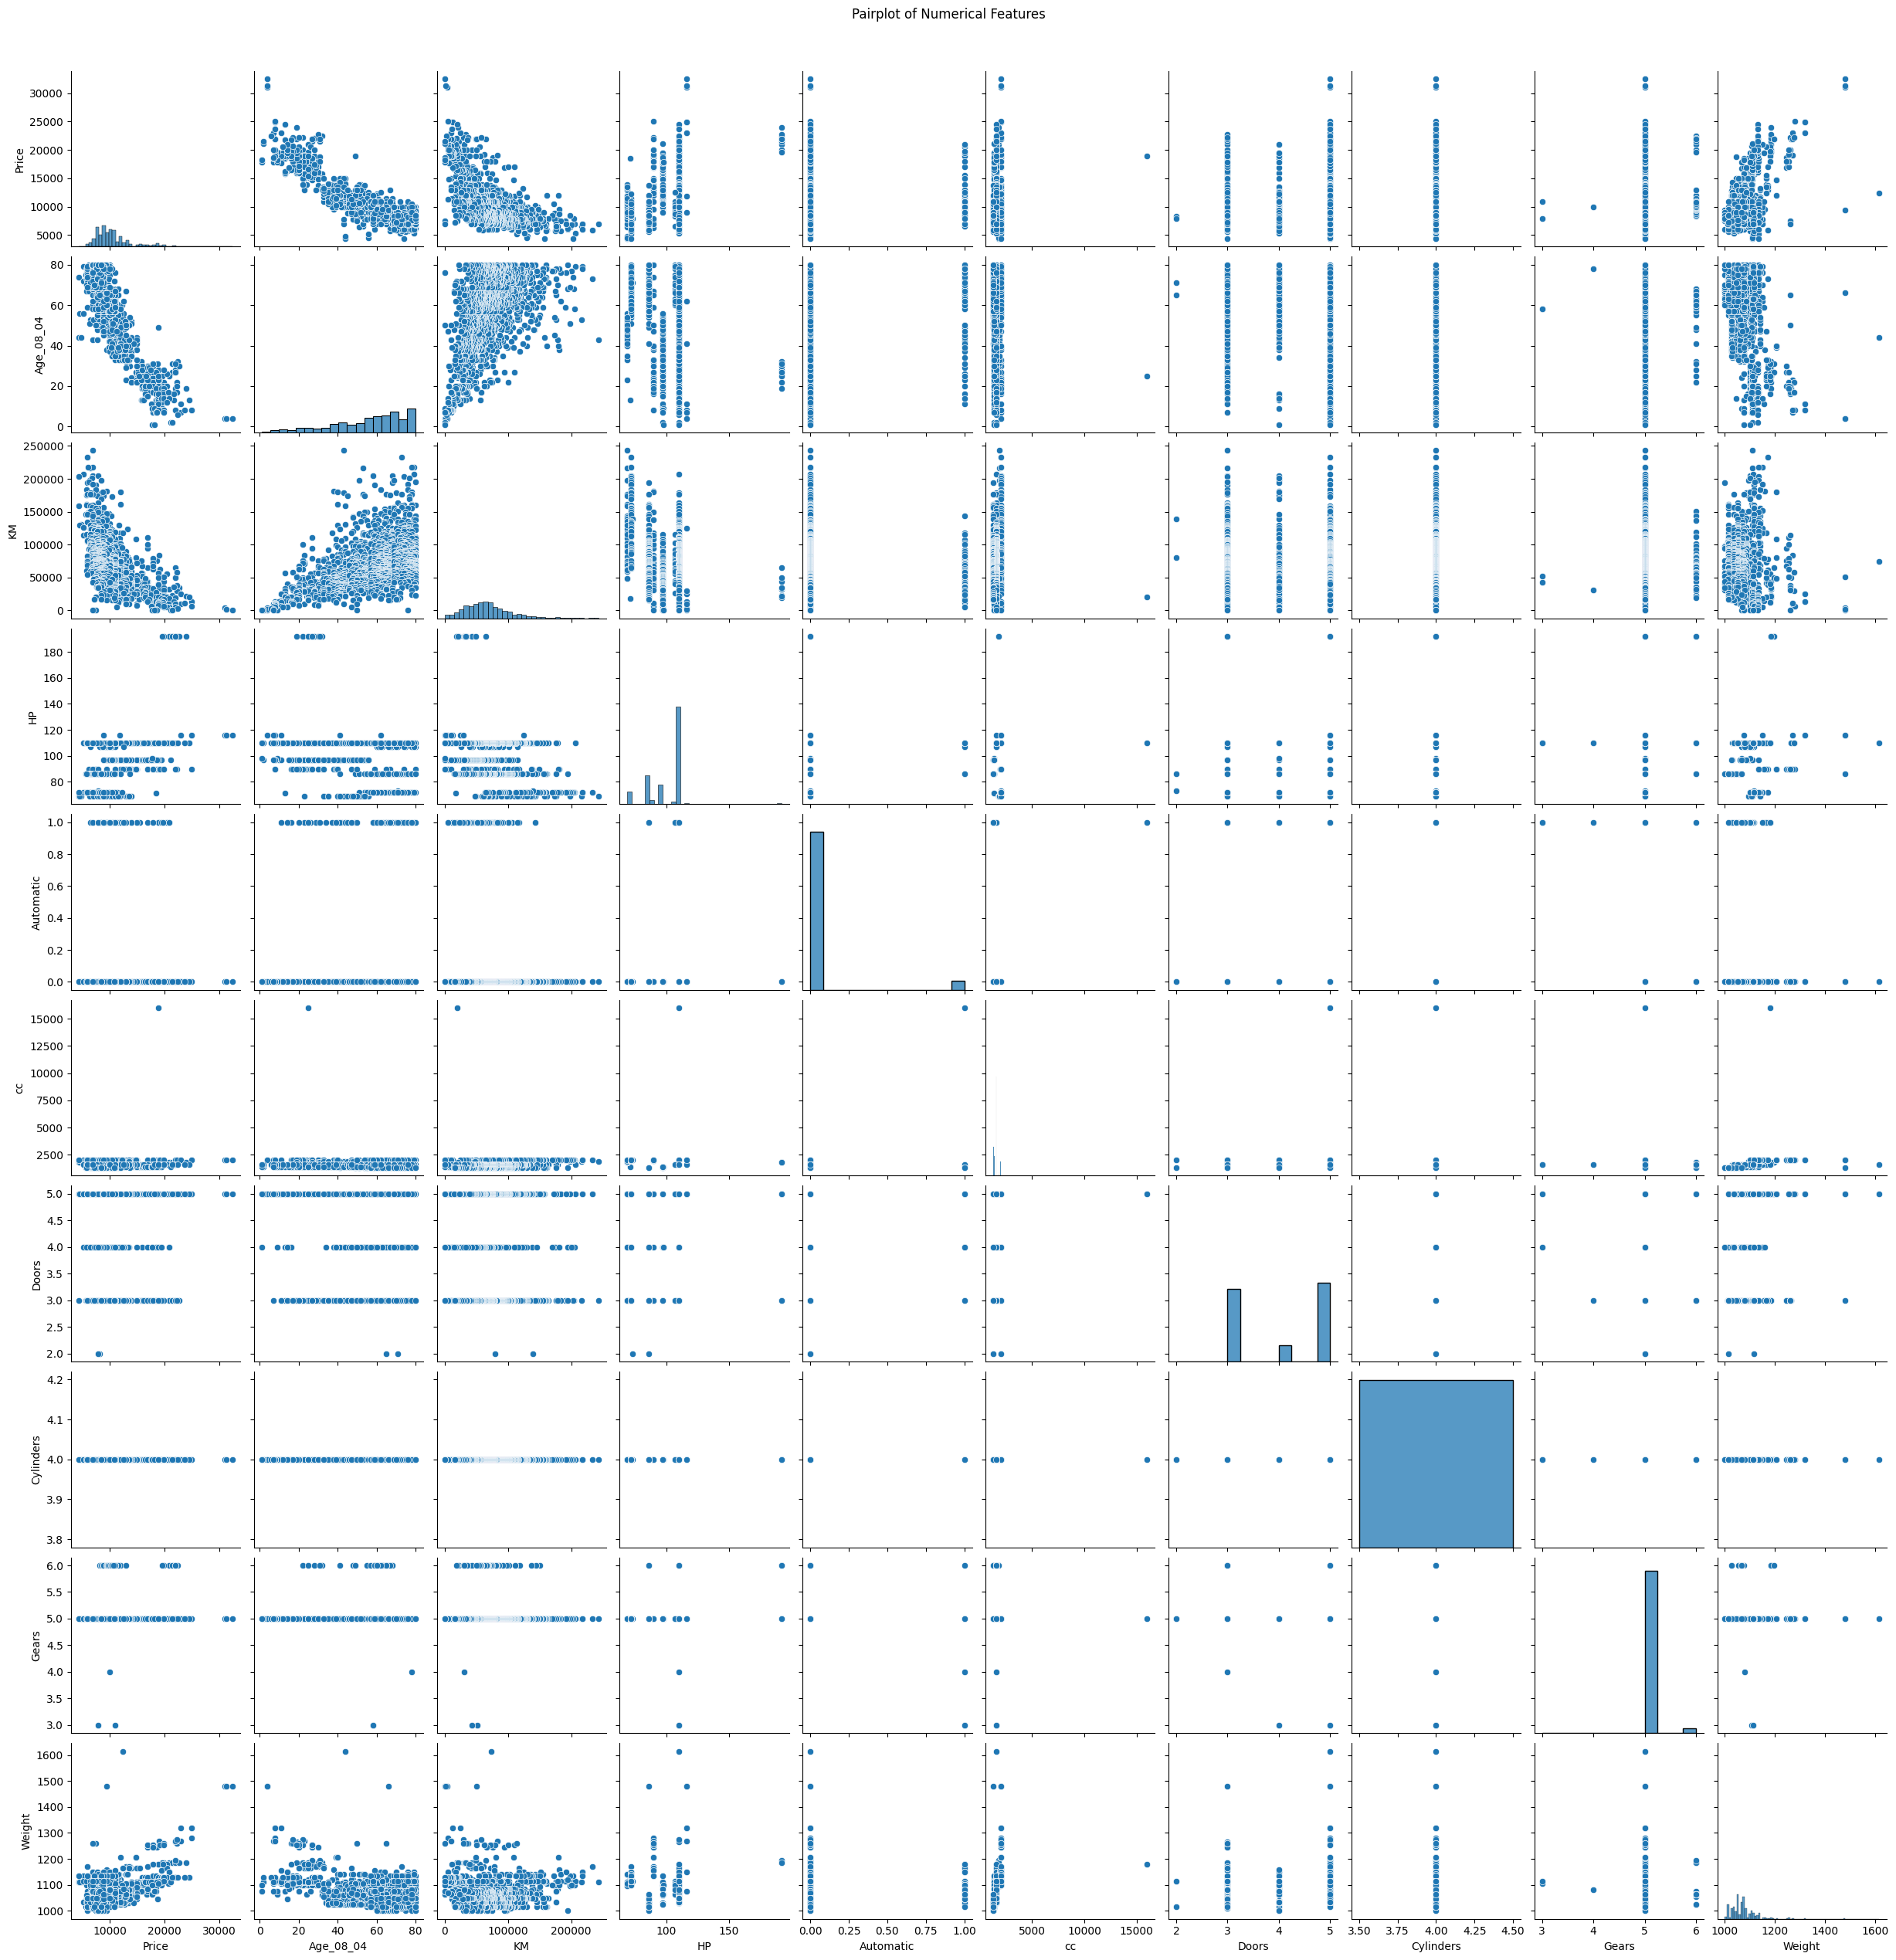

In [ ]:
# Pairplot of numerical features (skip if too slow for large data)
sns.pairplot(df.select_dtypes(include='number'))
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

In [ ]:
# Correlation Heatmap
# Convert categorical columns before computing correlation
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)  # One-hot encode FuelType


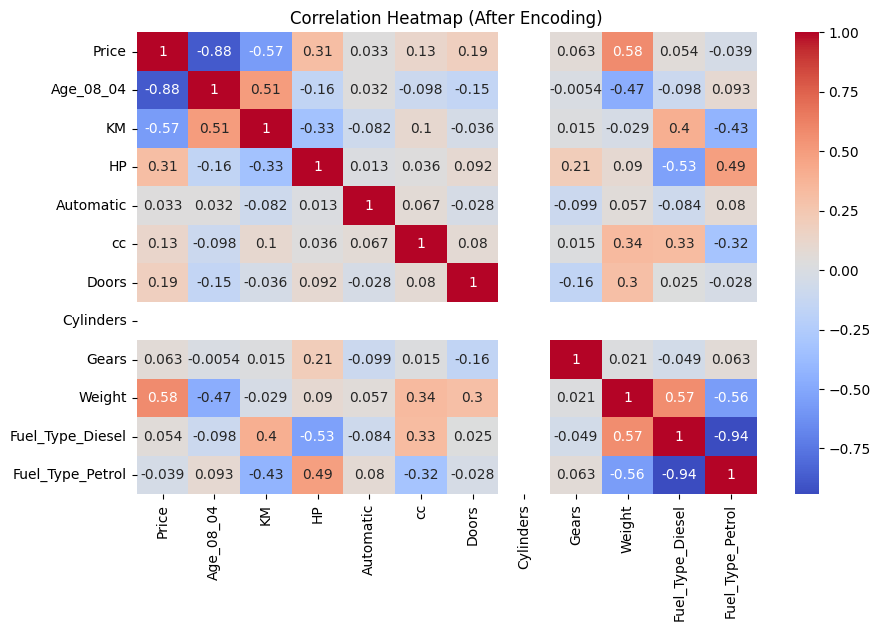

In [ ]:
# Plotting the heatmap for correlation after encoding
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (After Encoding)")
plt.show()


In [ ]:
# 2. Preprocessing the data
# Select relevant columns (remove unnecessary columns)
df = df[['Price', 'Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Weight', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol']]


In [ ]:
# Split the dataset into training and testing sets
X = df.drop(columns='Price')  # Independent variables
y = df['Price']  # Dependent variable (target)

In [ ]:
# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Feature scaling for numerical features (important for Ridge and Lasso)
scaler = StandardScaler()
X_train[['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Weight']] = scaler.fit_transform(X_train[['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Weight']])
X_test[['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Weight']] = scaler.transform(X_test[['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Weight']])


In [ ]:
# 3. Multiple Linear Regression Model
# Building the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Model predictions
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("\nMultiple Linear Regression Evaluation:")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")


Multiple Linear Regression Evaluation:
Mean Squared Error: 2224306.040393546
Root Mean Squared Error: 1491.4107550884653
R-squared: 0.8332952678447362


In [ ]:
# Interpreting the coefficients
print("\nModel Coefficients:")
for feature, coef in zip(X_train.columns, model.coef_):
    print(f"{feature}: {coef}")


Model Coefficients:
Age_08_04: -2267.1563025734495
KM: -600.1799905581763
HP: 234.13833240601494
Automatic: 93.08199343840447
cc: -14.098310804406395
Doors: -80.50083638641462
Weight: 1326.19035183082
Fuel_Type_Diesel: 4.202109588001733
Fuel_Type_Petrol: 1453.6944613310618


In [ ]:
# 4. Ridge Regression (L2 Regularization)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Predictions and evaluation
ridge_pred = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_rmse = np.sqrt(ridge_mse)
ridge_r2 = r2_score(y_test, ridge_pred)

print("\nRidge Regression Evaluation:")
print(f"Mean Squared Error: {ridge_mse}")
print(f"Root Mean Squared Error: {ridge_rmse}")
print(f"R-squared: {ridge_r2}")


Ridge Regression Evaluation:
Mean Squared Error: 2219203.0345914825
Root Mean Squared Error: 1489.6989744882965
R-squared: 0.833677722057408


In [ ]:
# 5. Lasso Regression (L1 Regularization)
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Predictions and evaluation
lasso_pred = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_rmse = np.sqrt(lasso_mse)
lasso_r2 = r2_score(y_test, lasso_pred)

print("\nLasso Regression Evaluation:")
print(f"Mean Squared Error: {lasso_mse}")
print(f"Root Mean Squared Error: {lasso_rmse}")
print(f"R-squared: {lasso_r2}")


Lasso Regression Evaluation:
Mean Squared Error: 2223975.4905794444
Root Mean Squared Error: 1491.2999331386843
R-squared: 0.8333200415122186


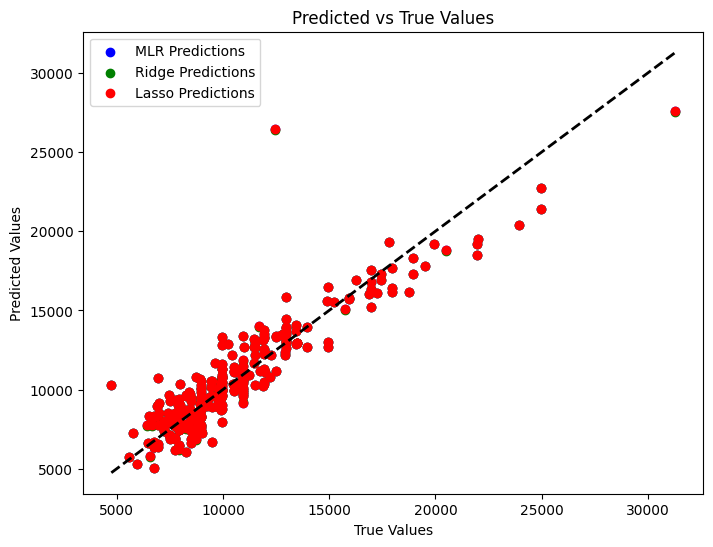

In [ ]:
# 6. Visualizing Predictions vs True Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='MLR Predictions')
plt.scatter(y_test, ridge_pred, color='green', label='Ridge Predictions')
plt.scatter(y_test, lasso_pred, color='red', label='Lasso Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs True Values")
plt.legend()
plt.show()

1. **What is Normalization & Standardization and how is it helpful?**
Normalization and standardization are methods to scale numerical data.

Normalization scales the values between 0 and 1.

Standardization scales data so it has a mean of 0 and standard deviation of 1.

They help models perform better by making features comparable, especially for algorithms that depend on distances (like KNN, SVM) or gradient-based methods (like logistic regression).

2. **What techniques can be used to address multicollinearity in multiple linear regression?**
Remove one of the correlated variables.

Use Principal Component Analysis (PCA) to reduce dimensions.

Use Ridge or Lasso Regression, which are regularization techniques.

Check Variance Inflation Factor (VIF) and drop variables with high VIF values.

